<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/ML/Projects/Electro-Pi-projects/Regression/Kopie_von_%D9%8CRegression_CapStone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

#Packages

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import openpyxl
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from tqdm import tqdm 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('drive/MyDrive/Fusion')

In [ ]:
!ls

 50_Startups.csv	   diabetes_null.csv   unprocessed_data.csv
 boston.csv		   Insurance.xlsx
'Concrete_Data (4).xlsx'   Salary_Data.csv


#Load and Read the Data



In [ ]:
df = pd.read_excel('Concrete_Data (4).xlsx', engine='openpyxl')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.768036


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   float64
 8   Concrete compressive strength(MPa, megapascals)  

#Data Cleaning

###Check for Missing Data


In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


### Drop Rows with None Values

In [ ]:
# df = df.dropna()
# df.head()

### Describe the Data


In [ ]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


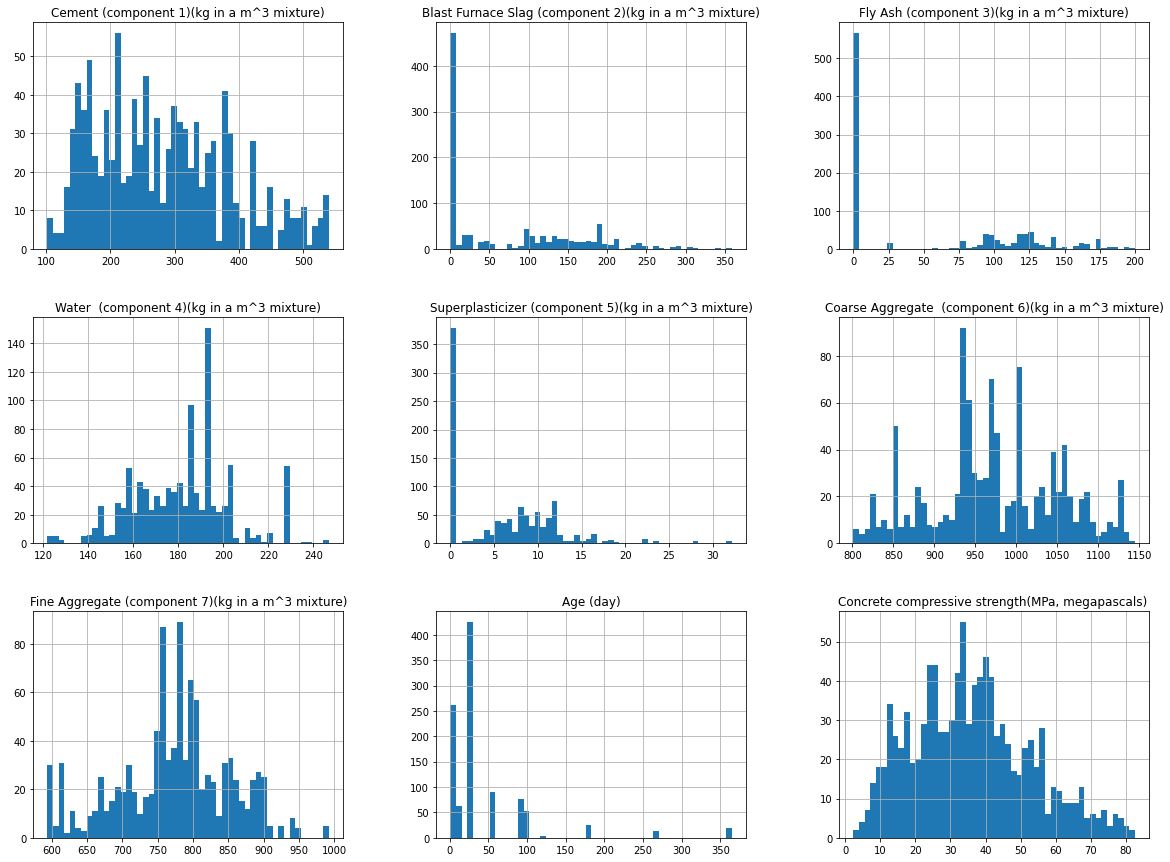

In [ ]:
# Histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

### Data Visualization

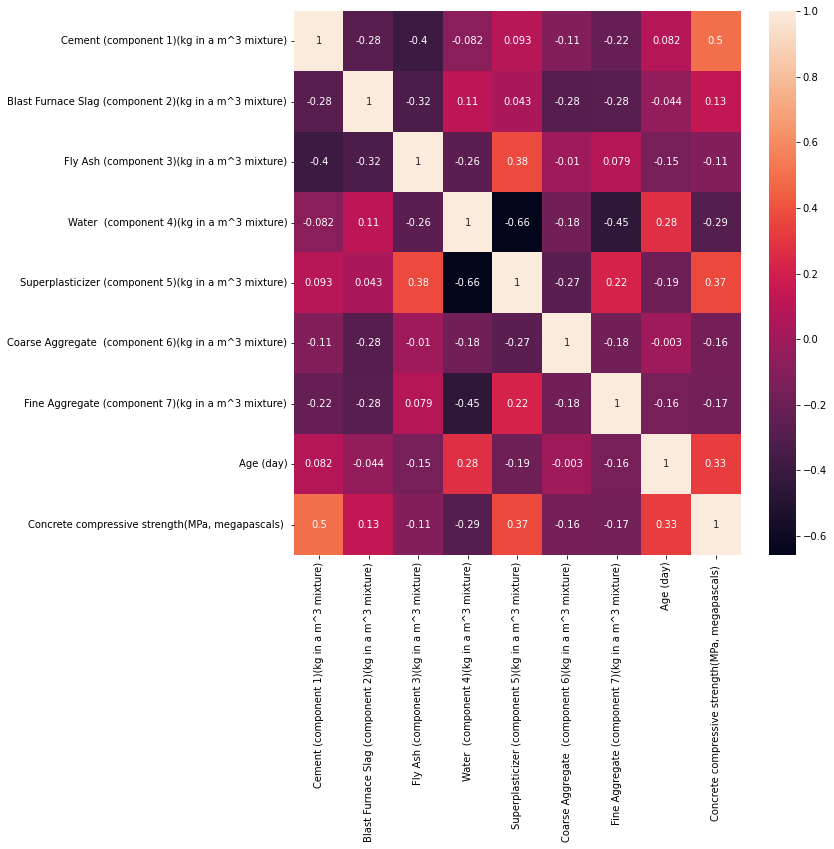

In [ ]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

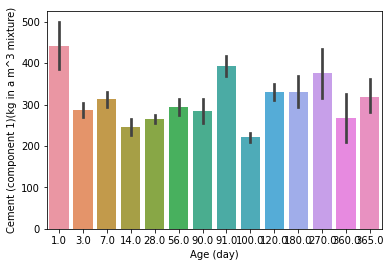

In [ ]:
# barplot
sns.barplot(x='Age (day)',y='Cement (component 1)(kg in a m^3 mixture)',data=df)
plt.show()

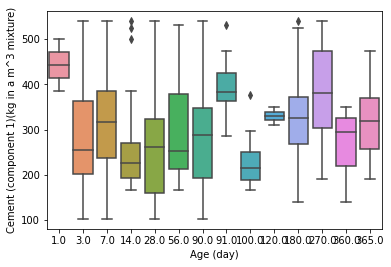

In [ ]:
# boxplot 
plot = sns.boxplot(x='Age (day)',y='Cement (component 1)(kg in a m^3 mixture)', data=df)
plt.show()

# Data Preprocessing

### Splitting Data

In [ ]:
y=df.iloc[:,-1:].values
X=df.iloc[:,:-1].values
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (1030, 8) 
 y_shape: (1030, 1)


In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.20, random_state=42,shuffle=True)

In [ ]:
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (824, 8) & X_test: (206, 8)
 y_train: (824, 1) & y_test: (206, 1)


### Normalization

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

0.0
1.0000000000000002


In [ ]:
std_scaler = StandardScaler()
X_train_sc =std_scaler.fit_transform(X_train)
X_test_sc =std_scaler.transform(X_test)

print(np.std(X_train_sc))

1.0


# Select and Train a Model

###Training and Evaluating on the Training Set

> Eingerückter Textblock



In [ ]:
# Linear Regession
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_pred_train_n =lin_reg.predict(X_train_scaled)
y_pred_n = lin_reg.predict(X_test_scaled)
# print("Predictions:", y_pred[:5])
print('After Normalization:')
print('Mean squared error of Linear Regression :', mean_squared_error(y_pred_n,y_test))
print('R squared of Linear Regression :', r2_score(y_test,y_pred_n))
print(r2_score(y_train,y_pred_train_n))

After Normalization:
Mean squared error of Linear Regression : 95.9754843533772
R squared of Linear Regression : 0.6275416055429015
0.6104593527939592


In [ ]:
lin_reg_ = LinearRegression()
lin_reg_.fit(X_train_sc,y_train)
y_pred_train_s =lin_reg_.predict(X_train_sc)
y_pred_s = lin_reg_.predict(X_test_sc) 
# print("Predictions:", y_pred_[:5])
print('After Standardization:')
print('Mean squared error of Linear Regression :', mean_squared_error(y_pred_s ,y_test))
print('R squared of Linear Regression :', r2_score(y_test,y_pred_s))
print(r2_score(y_train,y_pred_train_s))

After Standardization:
Mean squared error of Linear Regression : 95.97548435337704
R squared of Linear Regression : 0.6275416055429022
0.6104593527939592


#### to increase the accuracy we have 3 options:

1.   Increasing of features.
2.   Adding Polynomial features.
3.   decreasing lamda in regularization.




### Adding Polynomial features.

In [ ]:
print('After Normalization and adding Polynomial features: \n')
r2_res = []
res = []
for i in tqdm(range(1,10)):
  poly_reg = PolynomialFeatures(degree = i)
  X_train_poly_n = poly_reg.fit_transform(X_train_scaled)
  X_test_poly_n = poly_reg.transform(X_test_scaled)
  lin_reg_2 = LinearRegression()
  lin_reg_2.fit(X_train_poly_n, y_train)
  y_poly_pred_n = lin_reg_2.predict(X_test_poly_n)
  y_poly_pred_n_ = lin_reg_2.predict(X_train_poly_n)
  r2_res.append(r2_score(y_train,y_poly_pred_n_))
  res.append(r2_score(y_test,y_poly_pred_n))
print('\n the Highest R Squared for Train of Linear Regression: {}'.format(max(r2_res)))
print(' the Highest R Squared of for Test  Linear Regression: {}'.format(max(res)))



After Normalization and adding Polynomial features: 



100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


 the Highest R Squared for Train of Linear Regression: 0.9975417004089854
 the Highest R Squared of for Test  Linear Regression: 0.8437173906889689


In [ ]:
print('After Standardization and adding Polynomial features: \n')
r2_res = []
res = []
for i in tqdm(range(1,10)):
  poly_reg = PolynomialFeatures(degree = i)
  X_train_poly_s = poly_reg.fit_transform(X_train_sc)
  X_test_poly_s = poly_reg.transform(X_test_sc)
  lin_reg_2 = LinearRegression()
  lin_reg_2.fit(X_train_poly_s, y_train)
  y_poly_pred_s = lin_reg_2.predict(X_test_poly_s)
  y_poly_pred_s_ = lin_reg_2.predict(X_train_poly_s)
  r2_res.append(r2_score(y_train,y_poly_pred_s_))
  res.append(r2_score(y_test,y_poly_pred_s))
print('\n the Highest R Squared for Train of Linear Regression: {}'.format(max(r2_res)))
print(' the Highest R Squared  for Test  of Linear Regression: {}'.format(max(res)))

After Standardization and adding Polynomial features: 



100%|██████████| 9/9 [00:12<00:00,  1.42s/it]


 the Highest R Squared for Train of Linear Regression: 0.9975417004090303
 the Highest R Squared  for Test  of Linear Regression: 0.8437173906889629


# Regularization techniques


### Ridge regressor

In [ ]:
print('After Normalization and adding Polynomial features and use ridge regressor: \n')
for alpha in tqdm([1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1]):
  ridge =  Ridge(alpha = alpha)
  ridge.fit(X_train_poly_n, y_train)
  ridge_pred_0 = ridge.predict(X_test_poly_n)
  ridge_pred_0_ = ridge.predict(X_train_poly_n)
  n_test = r2_score(y_test,ridge_pred_0)
  n_train = r2_score(y_train,ridge_pred_0_)
  print('\n  R Squared of Training dataset: {}'.format(n_train))
  print('    R Squared of test dataset: {}'.format(n_test))

After Normalization and adding Polynomial features and use ridge regressor: 



  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
 14%|█▍        | 1/7 [00:00<00:05,  1.04it/s]


  R Squared of Training dataset: 0.9972863070914298
    R Squared of test dataset: -8171080.897805577


 29%|██▊       | 2/7 [00:01<00:04,  1.22it/s]


  R Squared of Training dataset: 0.9960998569281706
    R Squared of test dataset: -65626.94126666656


 43%|████▎     | 3/7 [00:02<00:03,  1.31it/s]


  R Squared of Training dataset: 0.9927556148044563
    R Squared of test dataset: -118.35891264565802


 57%|█████▋    | 4/7 [00:03<00:02,  1.32it/s]


  R Squared of Training dataset: 0.977532215090559
    R Squared of test dataset: 0.6883375977336617


 71%|███████▏  | 5/7 [00:03<00:01,  1.33it/s]


  R Squared of Training dataset: 0.9639580464027897
    R Squared of test dataset: 0.8612700848055804


 86%|████████▌ | 6/7 [00:04<00:00,  1.32it/s]


  R Squared of Training dataset: 0.9414337871220995
    R Squared of test dataset: 0.8658455318742334


100%|██████████| 7/7 [00:05<00:00,  1.31it/s]


  R Squared of Training dataset: 0.8458407237637674
    R Squared of test dataset: 0.8023514783879364


In [ ]:
print('After Standardization and adding Polynomial features and use ridge regressor: \n')
for alpha in tqdm([1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1]):
  ridge =  Ridge(alpha = alpha)
  ridge.fit(X_train_poly_s, y_train)
  ridge_pred_1 = ridge.predict(X_test_poly_s)
  ridge_pred_1_ = ridge.predict(X_train_poly_s)
  s_test = r2_score(y_test,ridge_pred_1)
  s_train = r2_score(y_train,ridge_pred_1_)
  print('\n R Squared of Training dataset: {}'.format(s_train))
  print(' R Squared of test dataset: {}'.format(s_test))

After Standardization and adding Polynomial features and use ridge regressor: 



  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
 14%|█▍        | 1/7 [00:01<00:09,  1.64s/it]


 R Squared of Training dataset: 0.9956703425267043
 R Squared of test dataset: -11085922.176828334


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
 29%|██▊       | 2/7 [00:03<00:08,  1.63s/it]


 R Squared of Training dataset: 0.9956703425267043
 R Squared of test dataset: -11085922.176828334


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
 43%|████▎     | 3/7 [00:04<00:06,  1.64s/it]


 R Squared of Training dataset: 0.9956703425267043
 R Squared of test dataset: -11085922.176828334


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=3.75495e-20): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
 57%|█████▋    | 4/7 [00:06<00:04,  1.54s/it]


 R Squared of Training dataset: 0.8770509201639989
 R Squared of test dataset: -348729700.31047565


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=9.34508e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
 71%|███████▏  | 5/7 [00:07<00:02,  1.40s/it]


 R Squared of Training dataset: 0.9971162150331416
 R Squared of test dataset: -3876125.64159976


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.04447e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
 86%|████████▌ | 6/7 [00:08<00:01,  1.33s/it]


 R Squared of Training dataset: 0.9969196811292894
 R Squared of test dataset: -16139698.711540136


100%|██████████| 7/7 [00:09<00:00,  1.40s/it]


 R Squared of Training dataset: 0.99379550420406
 R Squared of test dataset: -1206555.6091606198


### Lasso regressor

In [ ]:
print('After Normalization and adding Polynomial features and use lasso regressor: \n')
for alpha in tqdm([1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1]):
  lasso =  Lasso(alpha = alpha)
  lasso.fit(X_train_poly_n, y_train)
  lasso_pred_0 = lasso.predict(X_test_poly_n)
  lasso_pred_0_ = lasso.predict(X_train_poly_n)
  n_test = r2_score(y_test,lasso_pred_0)
  n_train = r2_score(y_train,lasso_pred_0_)
  print('\n R Squared of Training dataset: {}'.format(n_train))
  print(' R Squared of Test dataset: {}'.format(n_test))

After Normalization and adding Polynomial features and use lasso regressor: 



  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.361e+03, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 14%|█▍        | 1/7 [00:20<02:03, 20.54s/it]


 R Squared of Training dataset: 0.988373632868907
 R Squared of Test dataset: -3.2437260396198653


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+03, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 29%|██▊       | 2/7 [00:40<01:42, 20.41s/it]


 R Squared of Training dataset: 0.9883676909782405
 R Squared of Test dataset: -3.2439638092505563


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.601e+03, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 43%|████▎     | 3/7 [01:00<01:20, 20.08s/it]


 R Squared of Training dataset: 0.98763131058036
 R Squared of Test dataset: -3.3773394031925497


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.393e+03, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 57%|█████▋    | 4/7 [01:14<00:53, 17.68s/it]


 R Squared of Training dataset: 0.9503511803667011
 R Squared of Test dataset: 0.8055069140183715


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.205e+03, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 71%|███████▏  | 5/7 [01:28<00:32, 16.27s/it]


 R Squared of Training dataset: 0.9197502992501831
 R Squared of Test dataset: 0.8656240514993374


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.492e+01, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 86%|████████▌ | 6/7 [01:42<00:15, 15.41s/it]


 R Squared of Training dataset: 0.8382710376163174
 R Squared of Test dataset: 0.81631097748733


100%|██████████| 7/7 [01:42<00:00, 14.62s/it]


 R Squared of Training dataset: 0.19638536116208372
 R Squared of Test dataset: 0.1884405334787843


In [ ]:
print('After Standardization and adding Polynomial features and use ridge regressor: \n')
r2_res = []
mean_res = []
for alpha in tqdm([1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1]):
  lasso =  Lasso(alpha = alpha)
  lasso.fit(X_train_poly_s, y_train)
  lasso_pred_1 = lasso.predict(X_test_poly_s)
  lasso_pred_1_ = lasso.predict(X_train_poly_s)
  s_test = r2_score(y_test,lasso_pred_1)
  s_train = r2_score(y_train,lasso_pred_1_)
  print('\n R Squared of Training dataset: {}'.format(s_train))
  print(' R Squared of Test dataset: {}'.format(s_test))

After Standardization and adding Polynomial features and use ridge regressor: 



  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.998e+03, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 14%|█▍        | 1/7 [00:22<02:13, 22.18s/it]


 R Squared of Training dataset: 0.9829295566875443
 R Squared of Test dataset: -10.047210163505627


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.998e+03, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 29%|██▊       | 2/7 [00:42<01:45, 21.03s/it]


 R Squared of Training dataset: 0.9829295566398516
 R Squared of Test dataset: -10.047210132763055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.998e+03, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 43%|████▎     | 3/7 [01:02<01:22, 20.64s/it]


 R Squared of Training dataset: 0.9829295519181211
 R Squared of Test dataset: -10.047207088720006


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+03, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 57%|█████▋    | 4/7 [01:22<01:01, 20.45s/it]


 R Squared of Training dataset: 0.9828771244792766
 R Squared of Test dataset: -10.008597308067902


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.883e+03, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 71%|███████▏  | 5/7 [01:42<00:40, 20.15s/it]


 R Squared of Training dataset: 0.9821011498755098
 R Squared of Test dataset: -9.680708728500331


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.159e+03, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 86%|████████▌ | 6/7 [01:59<00:19, 19.05s/it]


 R Squared of Training dataset: 0.9742923143812536
 R Squared of Test dataset: -7.051436447444317


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.362e+04, tolerance: 2.341e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
100%|██████████| 7/7 [02:17<00:00, 19.62s/it]


 R Squared of Training dataset: 0.8065958068681289
 R Squared of Test dataset: 0.4219015868037874


# Plotting predictions

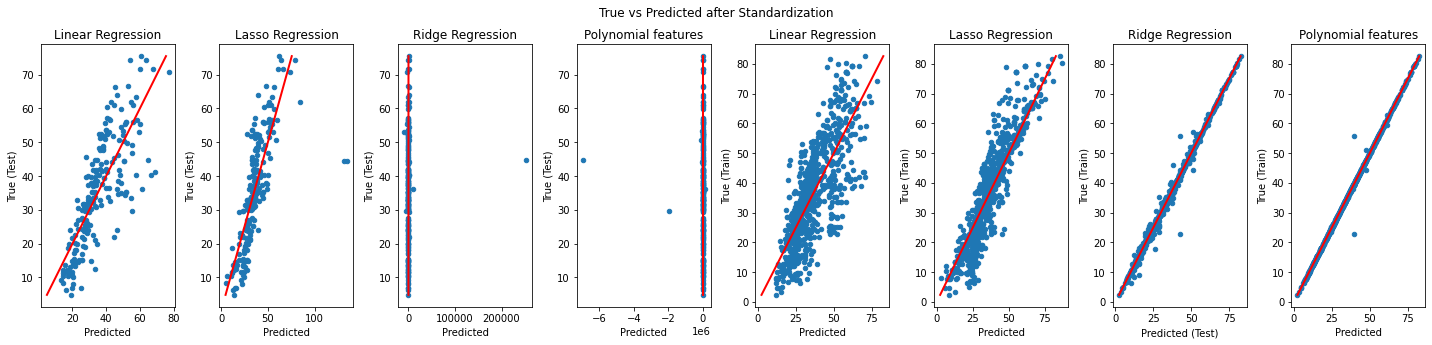

In [ ]:
# Standardization
fig, (ax1, ax2, ax3, ax4, ax5 , ax6 , ax7 ,ax8) = plt.subplots(1,8, figsize=(20,5))

ax1.scatter(y_pred_s, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax1.set_ylabel("True (Test)")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")


ax2.scatter(lasso_pred_1, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax2.set_ylabel("True (Test)")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(ridge_pred_1, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax3.set_ylabel("True (Test)")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")


ax4.scatter(y_poly_pred_s, y_test, s=20)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax4.set_ylabel("True (Test)")
ax4.set_xlabel("Predicted")
ax4.set_title("Polynomial features")


ax5.scatter(y_pred_train_s, y_train, s=20)
ax5.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
ax5.set_ylabel("True (Train)")
ax5.set_xlabel("Predicted")
ax5.set_title("Linear Regression")


ax6.scatter(lasso_pred_1_, y_train, s=20)
ax6.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
ax6.set_ylabel("True (Train)")
ax6.set_xlabel("Predicted")
ax6.set_title("Lasso Regression")


ax7.scatter(ridge_pred_1_, y_train, s=20)
ax7.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
ax7.set_ylabel("True (Train)")
ax7.set_xlabel("Predicted (Test)")
ax7.set_title("Ridge Regression")



ax8.scatter(y_poly_pred_s_, y_train, s=20)
ax8.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
ax8.set_ylabel("True (Train)")
ax8.set_xlabel("Predicted")
ax8.set_title("Polynomial features")




fig.suptitle("True vs Predicted after Standardization")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

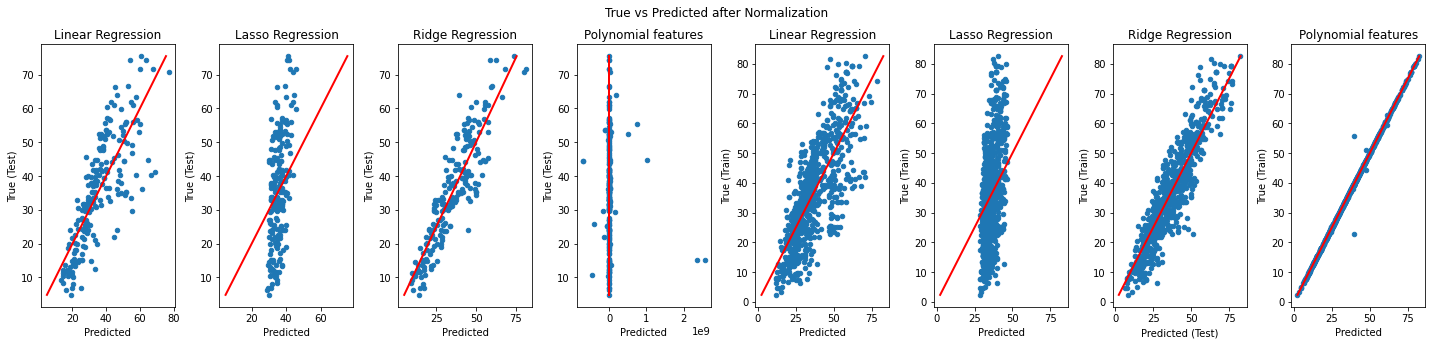

In [ ]:
# Normalization
fig, (ax1, ax2, ax3, ax4, ax5 , ax6 , ax7 ,ax8) = plt.subplots(1,8, figsize=(20,5))

ax1.scatter(y_pred_n, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax1.set_ylabel("True (Test)")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")


ax2.scatter(lasso_pred_0, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax2.set_ylabel("True (Test)")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(ridge_pred_0, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax3.set_ylabel("True (Test)")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")


ax4.scatter(y_poly_pred_n, y_test, s=20)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax4.set_ylabel("True (Test)")
ax4.set_xlabel("Predicted")
ax4.set_title("Polynomial features")


ax5.scatter(y_pred_train_n, y_train, s=20)
ax5.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
ax5.set_ylabel("True (Train)")
ax5.set_xlabel("Predicted")
ax5.set_title("Linear Regression")


ax6.scatter(lasso_pred_0_, y_train, s=20)
ax6.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
ax6.set_ylabel("True (Train)")
ax6.set_xlabel("Predicted")
ax6.set_title("Lasso Regression")


ax7.scatter(ridge_pred_0_, y_train, s=20)
ax7.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
ax7.set_ylabel("True (Train)")
ax7.set_xlabel("Predicted (Test)")
ax7.set_title("Ridge Regression")



ax8.scatter(y_poly_pred_n_, y_train, s=20)
ax8.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
ax8.set_ylabel("True (Train)")
ax8.set_xlabel("Predicted")
ax8.set_title("Polynomial features")

fig.suptitle("True vs Predicted after Normalization")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])